In [29]:
import seaborn as sns
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import qgrid
import statsmodels as sm
import scipy
from pathlib import Path

In [ ]:
Checkb=np.zeros((210,206,100))

for i in range(210):
    for j in range(206):
        if (np.floor(i/2)+np.floor(j/2))%2==0:
            for k in range(100):
                Checkb[i,j,k]=1        

for i in range(210):
    for j in range(206):                
        for k in range(100):
            if np.floor(k/2)%2==0:
                Checkb[i,j,k]=abs(1-Checkb[i,j,k])                     

In [30]:
HB=pd.read_csv('C:\\Users\\aimon\\Desktop\\HeadButtingEvents.csv',header=None)


In [33]:
HB=HB.rename(columns={3: "Count"})
HB=HB.rename(columns={5: "Light_dark"})
HB=HB.rename(columns={6: "Asymmetry"})
HB=HB.rename(columns={7: "Shape"})
HB=HB.rename(columns={8: "Age"})

In [61]:
for j in range(24):
        HelpString=HB.iloc[j,0].split('_')
        HB.loc[j,'TimeOfDay']=float(HelpString[1])

In [62]:
for j in range(24):
        HB.loc[j,'Age']=float(HB.loc[j,'Age'])

In [65]:
for j in range(24):
        HB.loc[j,'TimeOfDay']=float(HB.loc[j,'TimeOfDay'])

In [72]:
HB['TimeOfDay'] = HB['TimeOfDay'].apply(pd.to_numeric)

In [73]:
result = smf.ols(formula="Count ~ TimeOfDay", data=HB).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5559
Date:                Wed, 03 Nov 2021   Prob (F-statistic):              0.464
Time:                        20:32:41   Log-Likelihood:                -94.444
No. Observations:                  24   AIC:                             192.9
Df Residuals:                      22   BIC:                             195.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0980     16.108      1.744      0.095      -5.309      61.505
TimeOfDay   -8.21e-05      0.000     -0.746      0.464      -0.000       0.000
==============================================================================
Omnibus:                       11.529   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.739
Skew:                           1.369   Prob(JB):                      0.00768
Kurtosis:                       4.496   Cond. No.                     8.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
result = smf.ols(formula="Count ~ Light_dark+Asymmetry+Shape+Age+TimeOfDay", data=HB).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.7683
Date:                Wed, 03 Nov 2021   Prob (F-statistic):              0.585
Time:                        20:32:46   Log-Likelihood:                -92.422
No. Observations:                  24   AIC:                             196.8
Df Residuals:                      18   BIC:                             203.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.0435     30.797      1.170      0.257     -28.658     100.745
Light_dark[T.l]     2.2436      7.244      0.310      0.760     -12.975      17.462
Asymmetry[T.c]     -8.3256      6.539     -1.273      0.219     -22.064       5.413
Shape[T.s]          5.1292      6.249      0.821      0.422      -7.999      18.258
Age                -1.1472      2.745     -0.418      0.681      -6.915       4.621
TimeOfDay       -7.695e-05      0.000     -0.619      0.544      -0.000       0.000
==============================================================================
Omnibus:                        8.013   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.869
Skew:                           1.108   Prob(JB):                       0.0532
Kurtosis:                       3.978   Cond. No.                     1.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.17588982718398816


,sum_sq,df,F,PR(>F)
Light_dark,16.569126,1.0,0.095931,0.760326
Asymmetry,279.967210,1.0,1.620933,0.219160
Shape,116.363846,1.0,0.673715,0.422497
Age,30.157555,1.0,0.174604,0.680994
TimeOfDay,66.213803,1.0,0.383360,0.543568
Residual,3108.955627,18.0,NaN,NaN


In [54]:
result = smf.ols(formula="Count ~ TimeOfDay", data=HB).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 03 Nov 2021   Prob (F-statistic):                nan
Time:                        20:24:15   Log-Likelihood:                 724.03
No. Observations:                  24   AIC:                            -1400.
Df Residuals:                       0   BIC:                            -1372.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0000        inf          0        nan         nan         nan
TimeOfDay[T.101314]    42.0000        inf          0        nan         nan         nan
TimeOfDay[T.110404]    -3.0000        inf         -0        nan         nan         nan
TimeOfDay[T.115330]    -3.0000        inf         -0        nan         nan         nan
TimeOfDay[T.120704]   -10.0000        inf         -0        nan         nan         nan
TimeOfDay[T.122245]    -7.0000        inf         -0        nan         nan         nan
TimeOfDay[T.132149]     1.0000        inf          0        nan         nan         nan
TimeOfDay[T.134122]    34.0000        inf          0        nan         nan         nan
TimeOfDay[T.135454]    -4.0000        inf         -0        nan         nan         nan
TimeOfDay[T.140532]     8.0000        inf          0        nan         nan         nan
TimeOfDay[T.144257]     4.0000        inf          0        nan         nan         nan
TimeOfDay[T.144523]  6.033e-14        inf          0        nan         nan         nan
TimeOfDay[T.150319]     7.0000        inf          0        nan         nan         nan
TimeOfDay[T.150412]    -9.0000        inf         -0        nan         nan         nan
TimeOfDay[T.154926]    -4.0000        inf         -0        nan         nan         nan
TimeOfDay[T.155004]    -5.0000        inf         -0        nan         nan         nan
TimeOfDay[T.155759]    14.0000        inf          0        nan         nan         nan
TimeOfDay[T.161021]  7.461e-14        inf          0        nan         nan         nan
TimeOfDay[T.164244]    -1.0000        inf         -0        nan         nan         nan
TimeOfDay[T.164841]   -12.0000        inf         -0        nan         nan         nan
TimeOfDay[T.172231]    11.0000        inf          0        nan         nan         nan
TimeOfDay[T.172445]    12.0000        inf          0        nan         nan         nan
TimeOfDay[T.173957]     7.0000        inf          0        nan         nan         nan
TimeOfDay[T.191611]    -4.0000        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                       34.292   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.022
Skew:                           2.629   Prob(JB):                     1.27e-19
Kurtosis:                      10.706   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

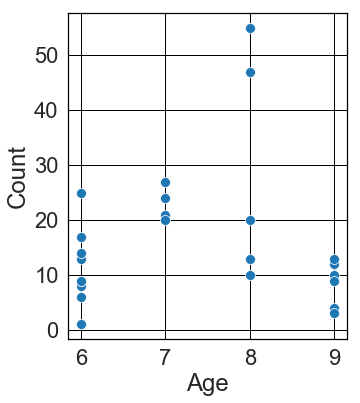

In [80]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(5, 6))
b = sns.scatterplot(x='Age',y='Count',data=HB,s=100)
      
#b = sns.boxplot(x='CompID',y='R2Groom',data=Compdf[(Compdf.CompID.isin(['AL','OL','KCab']))],color='r')
#b.set(xlabel='Compartment')


#plt.yticks([0,0.5])  
#plt.ylim([0,0.8])
#plt.savefig('AllLobesDFF.svg')
    
plt.show()

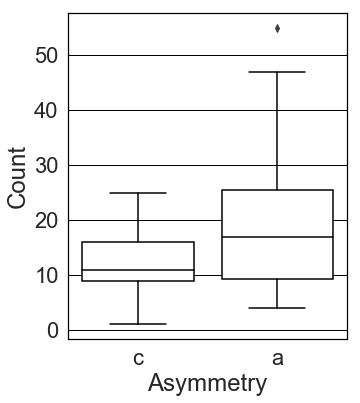

In [27]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(5, 6))
b = sns.boxplot(x='Asymmetry',y='Count',data=HB)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
            
            
#b = sns.boxplot(x='CompID',y='R2Groom',data=Compdf[(Compdf.CompID.isin(['AL','OL','KCab']))],color='r')
#b.set(xlabel='Compartment')


#plt.yticks([0,0.5])  
#plt.ylim([0,0.8])
#plt.savefig('AllLobesDFF.svg')
    
plt.show()

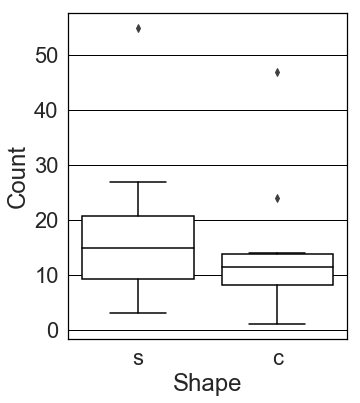

In [26]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(5, 6))
b = sns.boxplot(x='Shape',y='Count',data=HB)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
            
            
#b = sns.boxplot(x='CompID',y='R2Groom',data=Compdf[(Compdf.CompID.isin(['AL','OL','KCab']))],color='r')
#b.set(xlabel='Compartment')

#plt.yticks([0,0.5])  
#plt.ylim([0,0.8])
#plt.savefig('AllLobesDFF.svg')
    
plt.show()